# Vamos aprender sobre EDA! 😄 :
---



Agora que vocês já aprenderam os principais pontos sobre o assunto e compreenderam a importância de trabalhar com dados limpos e bem estruturados, é hora de colocar esse conhecimento em prática. Disponibilizamos 6 datasets reais, variando em tamanho e complexidade, para que vocês possam escolher aquele com o qual preferem trabalhar. O objetivo agora é aplicar suas novas habilidades, limpando os dados e extraindo insights a partir deles.
**Lembrando que é necessário selecionar apenas um dataset para desenvolver a atividade.** 😉

###Os datasets são:


*   **Mais de 30.000 filmes lançados nos últimos 60 anos**: este dataset inclui uma ampla gama de informações, como data de lançamento, diretor, indicações ao Oscar e orçamento.
*   **Titanic**: traz dados detalhados sobre as vítimas do trágico acidente, incluindo gênero, idade e número do bilhete.
*   **Aplicativo de namoro**: apresenta informações como quantidade de filhos, interesses e nível educacional dos usuários.
*   **Vinhos**: fornece dados sobre o país de origem, avaliação dos consumidores e preço.
*   **Acidentes de trânsito**: inclui variáveis como densidade do tráfego, quantidade de chuva e velocidade.
*   **Casamento e divorcios na Índia**: abrange aspectos como duração do casamento, tipo de união e casta.








## 1.1 - Leitura dos dados e realização de descrição estatística
---



O dataframe será gerado automaticamente ao executar a célula com o método `pd.read_csv()` da biblioteca [pandas](https://pandas.pydata.org/pandas-docs/stable/).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Forma manual de abrir o arquivo
import csv

with open("marriage_divorce_india_with_id.csv", mode="r", encoding="utf-8") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

Comparando os métodos de como abrir um arquivo CSV, fica fácil entender por que o Pandas é tão útil. Fazer tudo "na mão" com open() exige abrir o arquivo, ler linha por linha, separar valores e tratar dados manualmente — dá trabalho e é fácil errar.

Com o Pandas, basta um comando como pd.read_csv("arquivo.csv"), e tudo fica organizado em uma tabela, com tipos de dados reconhecidos e várias ferramentas prontas para análise.😊

In [ ]:
# Usando Pandas para abrir o arquivo
# Adicione entre as '' o caminho do arquivo correspondente ao dataset selecionado.
# sep = parâmetro sobre qual caractere separa os valores no csv
# valores podem ser separados por qualquer caractere. Default: ',' 
dataset = pd.read_csv('marriage_divorce_india_with_id.csv', sep = ',')
dataset

### 💡 Antes de tudo, é importante realizar uma **análise estatística** para entender melhor a natureza dos dados:

Inspeção inicial dos dados:

**head()**: Mostra as primeiras linhas do dataset, ideal para dar uma olhada rápida na organização das colunas e nos valores iniciais.

**info()**: Faz um resumo completo, mostrando quantas linhas e colunas existem, os tipos de dados (int, float, object...) e se há valores faltando.

**describe()**: Gera estatísticas básicas das colunas numéricas, como média, valor mínimo, máximo e desvio padrão, ajudando a entender melhor como os números estão distribuídos.

Essas funções são indispensáveis para conhecer o dataset e planejar os próximos passos da análise!


Existem outras funções muito úteis também, principalmente quando se deseja **visualizar problemas** no dataset, são elas:

**value_counts()**

**unique()**

**isnull()**

**isnull().sum()**

 Sobre a função de cada uma, deixaremos para vocês explorarem por conta própria e aprenderem mais a fundo sobre. 🚀

In [ ]:
dataset.head() #parâmtros: quantas linhas mostrar. Default: 5

In [ ]:
dataset.tail() #parâmetros: quantas linhas finais mostra. Default: 5

In [ ]:
#nome da coluna, quantidade de nao nulos, tipo de dado
#strings retornam como object, já que são objetos do python
dataset.info()

In [ ]:
#descreve a estatística geral do dataframe por coluna (media, desvio, min e max)
#calcula somente de colunas em que o tipo é numérico
dataset.describe()

**SERIES**: são listas **unidimensionais** que possuem uma indexação. Exemplo:

[1, 2, 3, 4, 5] pode ser um Series em Pandas e possuir índices por meio de:

pd.Series([1, 2, 3, 4, 5], index = ['a', 'b', 'c', 'd', 'e'])


**value.counts()**: é um método que retorna um Series, informando a quantidade de vezes que um valor se repete em um dataset (ou em uma coluna). É um Series com esses values e index:  

**values são os valores de cada linha do dataset**  
**index são os valores que indexam cada linha do dataset**

bins = parâmetro de value_counts() que serve para dividir valores numericos em **intervalos**. **Serve apenas para Series que só possuem números**

In [ ]:
# PARÂMETROS: (normalize=False, bins, sort=True, dropna=True)

# normalize = retorna como porcentagem
# sort = retorna de forma ordenada (default True)
# dropna = não inclui nulos no cálculo

quant_urban_rural = dataset['Urban/Rural'].value_counts()


dataset['Children'].value_counts(bins=3, sort=False) # retorna a quantidade de filhos por invervalo

# SAÍDA:

# 0 a 1 filho
# 2 filhos
# 3 a 4 filhos


**Arrays Numpy**: são similares a listas de Python, mas possuem características diferentes

Array Numpy estão contíguos na memória, tornando-os mais eficientes

**.unique()**: retorna um tipo Array NumPy com todos os **valores únicos** de uma coluna 

In [ ]:
# PARÂMETROS: não possui

all_castes_religions = dataset['Caste/Religion'].unique() #retorna uma lista com as castas que existe

for a in all_castes_religions:
    print(a, end=' ')

In [ ]:
#informa se cada valor é nulo ou não
dataset.isnull() #para o dataframe inteiro
dataset['Children'].isnull() #para uma coluna

In [ ]:
#retorna quantos nulos existem
dataset.isnull().sum() #no dataset inteiro
dataset['Children'].isnull().sum() #em uma coluna específica, retorna um numero 

### Quando se fala de análise estatística, é inevitável não falarmos de **Boxplot**


Ele te ajuda a realizar um resumo estatístico visual dos dados, mostrando mediana, valor máximo e mínimo, distribuição dos dados, e, principalmente, os famosos **outliers**.

**Importante**: O boxplot complementa o uso do describe(). Enquanto o describe() fornece os valores exatos, o boxplot apresenta uma representação visual que facilita a interpretação. Ambos devem ser usados juntos para obter uma análise completa. 😎

**Faz toda diferença** se aprofundar para entender e interpretar os elementos do boxplot (mediana, quartis, outliers, e amplitude interquartil). Por isso, recomendamos procurarem sobre isso na internet. Aqui estão algumas sugestões:

[How to interpret a boxplot- Data analysis and visualization](https://en.fernandafperes.com.br/blog/boxplot-interpretation/)

[Interpreting box plots- video Khan Academy](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/interpreting-box-plots)


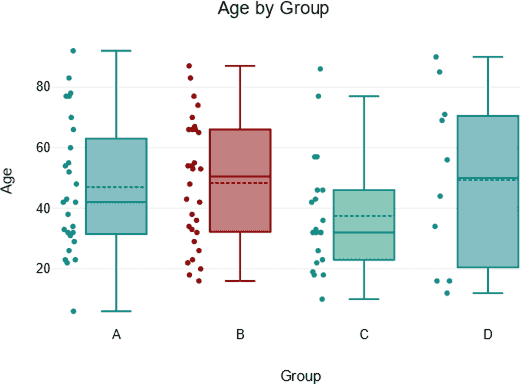

Para plotar o gráfico, use bibliotecas como: [matlotlib](https://matplotlib.org/stable/), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/)

**Como plotar boxplot com o seasborn**

sns.boxplot(data=**NOME DO DATASET**, x=**NOME DA COLUNA**)

Na parte do x, podemos escrever y, para mudar a orientação do boxplot

In [ ]:
sns.boxplot(y=dataset['Age at Marriage'])
plt.show()

In [ ]:
sns.boxplot(x=dataset['Caste/Religion'], y=dataset['Age at Marriage'])
plt.show()

## 1.2 - Limpeza de dados

---



Agora que temos uma visão geral dos dados, é hora de limpá-los! Remova inconsistências, como dados ausentes e tipos incorretos, para garantir a qualidade da análise exploratória. Novamente, consulte a documentação do pandas para ajudar nesse processo.

###Lembre-se que existem muitas funções ao seu favor! ✨

**dropna()**: Remove as linhas ou colunas com valores ausentes(nulos) ou irrelevantes para sua análise.

**fillna()**: Preenche os valores ausentes com algum valor específico, como a média, a mediana ou um valor constante, dependendo do contexto.

Essas funções são essenciais para garantir que seu dataset esteja limpo e pronto para análise! E o melhor é que existem muitas outras opções além dessas. Dêem uma olhada na documentação e descubram quais outras funções podem se adequar melhor à análise de vocês.

# Parâmetros de .dropna()

##  dropna(axis= , how=, subset=, inplace=)
**axis** = se exclui pela linha(axis=0) ou pela coluna (axis=1)  
**how** = se exclui apenas se todos os valores forem nulos ('all') ou se existir apenas 1 nulo ('any')  
**subset** = exclui apenas os valores nulos da coluna  
subset=['Nome da Coluna']  
**inplace** = se True, então modifica o dataset original, se False, cria uma cópia do dataframe

### Observações importantes

Se axis = 0, então .dropna() **exclui as linhas** que tiverem algum NULL

Se axis = 1, então .dropna() **exclui as colunas** que tiverem algum NULL

Se axis = 1 e subset: .dropna() apaga a **coluna** se linha tal tiver algum NULL

Se axis = 0 e subset='Coluna', então .dropna() apaga todas as **linhas** que tiverem NULL na 'Coluna'


In [ ]:
# apague todas as linhas que tiverem a coluna 'Age at Marriage' NULL
dataset.dropna(subset='Age at Marriage', inplace=True) 

In [ ]:
dataset['Age at Marriage'].dropna()

# Parâmetros de .drop()

### **.drop(axis, labels, index, columns, inplace, errors)**

**axis**: determina se exclui linha ou coluna  
**index**: intervalo de indices a serem excluidos  
**labels**: indica o nome da linha ou coluna a ser excluida  
**columns**: indica qual coluna vai ser excluida

In [ ]:
dataset.drop(index=range(0, 5)) #exclui as linhas de indice 0 a 4

In [ ]:
dataset.drop(columns='Age at Marriage') # exclui a coluna Age at Marriage

In [ ]:
dataset.drop(axis=1, labels='Unique ID') # exlui Unique ID

# Parâmetos de .fillna()

### **.fillna(value, axis)**

**axis**: preenche percorrendo as linhas ou coluna  
**value**: valor que quermeos preecnher os nulos

In [ ]:
dataset.fillna({'Age at Marriage': dataset['Age at Marriage'].mean()}, inplace=True) #este método é mais seguro!!

In [ ]:
dataset.fillna(max(dataset['Age at marriage'])) # preenche qualquer valor NULL do dataset com o valor máximo em 'Age at Marriage'

In [ ]:
dataset['Age at Marriage'].fillna(23, inplace=True) # preenche os nulos da coluna com 23

In [ ]:
dataset.head()

## 1.3 - Análise Exploratória dos Dados (EDA)

---



🔍 Após concluir a etapa de limpeza dos dados, agora é o momento de analisar mais a fundo o que está acontecendo no dataset.

O próximo passo é identificar correlações e examinar a distribuição das variáveis presentes. Para isso, recomenda-se o uso da biblioteca [matplotlib](https://matplotlib.org/) para criar gráficos que representem essas relações.

## Como fazer um gráfico em barras com matplot:

### **plt.bar(x= , height= )**

Existem vários parâmetros, mas os principais são:  

**x**: valor que estará no eixo x  
**height**: valores do eixto y

## **.index() e .values()**

São funções que quando aplicadas em um Series, retornam uma lista:  

**.index()**: indices  
**.values()**: valores de cada indice 

In [ ]:
#criando um gráfico de barras para ver quantidade de casamentos por religião

t = dataset['Caste/Religion'].value_counts()
t.drop(index='Other', inplace=True) #removendo 'other' do Series

# configurando os títulos
plt.title('Casamentos por religião', fontsize=14)
plt.xlabel('Religiões', fontsize=12)
plt.ylabel('Casamentos', fontsize=12)

plt.bar(x=t.index, height=t.values, width=0.6)
plt.show
plt.savefig('grafico_casamentos.png', dpi=600)

In [ ]:
contagem = dataset['Marriage Duration (Years)'].value_counts(bins=8, sort=False)

labels = [f"[{int(interval.left)}, {int(interval.right)})" for interval in contagem.index] # para truncar os valores float de value.counts()


plt.bar(x=labels, height=contagem.values)

plt.title('Quantidade de casamentos por intervalos de duração de tempo', fontsize=14)
plt.xlabel('Intervalos de tempo', fontsize=12)
plt.ylabel('Quantidade de casamentos', fontsize=12)

plt.show()
plt.savefig('casamento_intervalo.png', dpi=600)

In [ ]:
dataset.head()

In [ ]:
# quantidade de divorciados ou nao 

quant_divorce = dataset.groupby('Divorce Status')['Unique ID'].count()

plt.bar(x=quant_divorce.index, height=quant_divorce.values, width=0.6)

plt.title('Quantidade de divorciados', fontsize=14)
plt.xlabel('Yes = Divorced No = No divorced', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

In [ ]:
m_type = dataset['Marriage Type'].value_counts()

plt.bar(x=m_type.index, height=m_type.values, width=0.5)

plt.title('Quantidade por tipo de casamento', fontsize=14)
plt.xlabel('Tipos de casamento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

plt.show()

## 1.4 - Feature engeneering e dados categóricos

---



### 1.4.1 - Sempre que falamos de Data Science, lembramos dos diferentes tipos de dados. E, junto deles, surgem os temidos dados categóricos!

Esses dados são bem diferentes das variáveis numéricas, então a gente precisa dar uma atenção extra pra trabalhar com eles de forma eficaz. Bora transformar alguns deles usando os métodos que já vimos, como o **OneHotEncoder**! 🔥

Depois disso, vamos mergulhar no **Feature Engineering**!
Essa técnica é super poderosa e serve para extrair informações mais relevantes dos dados que já temos. Ela consiste em selecionar, manipular e transformar colunas e linhas do dataset, dando um novo significado ou enriquecendo as informações. Um exemplo clássico é a criação de uma coluna de IMC (Índice de Massa Corporal) a partir das colunas de altura e peso.

Agora é sua vez! Solte a criatividade e use sua intuição pra criar novos atributos a partir do que já está disponível.

**Dica**: Pegue as colunas que você já tem e use como base pra criar outras com características diferentes.

## Por que OneHotEncoder é importante

Os modelos de IA usam cálculos matemáticos para tentar predizer resultados.  
  
Assim, é importante que os dados sejam **apenas numéricos**, para que o modelo consiga trabalhar com eles

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder cria um objeto
# handle_unknowm diz para ignorar o erro caso surja uma categoria desconhecida
# sparse_output = False diz que deve retornar uma matriz normal 
# .set_output diz qual deve ser o formato de saída dessa matriz
# transform diz que a saída deve ser o formato para o pandas

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

#cria um DataSet em que cada coluna é uma categoria
# PARÂMETRO DE fit_transform( COLUNA A QUAL DEVE SER APLICADA )

oheTransform = ohe.fit_transform(dataset[['Marriage Type']])

# .concat() é um método que concatena dois dataset: PODE CONCATENAR POR LINHAS (axis=0) ou por COLUNAS (axis=1)
# .drop() serve para excluir a coluna Marriage Type com dados categoricos

df_final = pd.concat([dataset, oheTransform], axis=1).drop(columns=['Marriage Type'])
df_final

A ideia na célula seguinte é criar uma nova coluna para indicar se um casamento durou mais do que a idade em que a pessoa começou o casamento

1 se o tempo de casamento for maior que a idade em que casou, 0 se não

In [ ]:
dataset['More Time Marriage'] = dataset.apply(lambda x: 1 if x['Marriage Duration (Years)'] >= x['Age at Marriage'] else 0, axis=1)

dataset

### 1.4.2 - Em poucos termos, computadores não conseguem entender texto de maneira alguma, mas números, ah, esses as máquinas entendem bem pra caramba! Então, que tal usar as técnicas que aprendemos pra deixar tudo necessário em números?

**Dica**: Sempre que temos uma feature categórica que possui apenas 2 elementos, podemos transformar ela em uma flag binária! Agora o que isso significa eu deixo pra você pesquisar 😉

### **.map()**: usada para transformar dados strings em uma coluna  
  
**Parâmetros**

.map(**qualquer funcao**, **na_action**)  

**qualquer função**: permite definir uma função que vá alterar os valores da coluna (não muito util para dados não-categoricos).  
Para **dados categóricos**, usamos o dicionário em que cada chave é o valor a ser substituido, e o value no dicionário é o valor que vai substituir  

**na_action**: determina o que fazer se encontrar um nulo

In [ ]:
# transforma a coluna Divorce Status em uma flag binária

dataset['Divorce Status'] = dataset['Divorce Status'].map({'Yes': 1, 'No': 0})

dataset